# **Regressão Linear**

*Prof. Orlando Junior*

A análise de regressão linear é usada para prever o valor de uma variável com base no valor de outra. A variável que deseja prever é chamada de variável dependente. A variável que é usada para prever o valor de outra variável é chamada de variável independente.

Essa forma de análise estima os coeficientes da equação linear, envolvendo uma ou mais variáveis independentes que melhor preveem o valor da variável dependente. A regressão linear se ajusta a uma linha reta ou superficial que minimiza as discrepâncias entre os valores de saída previstos e reais. Há calculadoras de regressão linear simples que usam um método dos mínimos quadrados para descobrir a linha de melhor ajuste para um conjunto de dados emparelhados. Em seguida, o valor de X (variável dependente) de Y (variável independente) é estimado.

## Evolução da Diabetes

**Diabetes** é uma doença causada pela produção insuficiente ou má absorção de insulina, hormônio que regula a glicose no sangue e garante energia para o organismo. A insulina é um hormônio que tem a função de quebrar as moléculas de glicose(açúcar) transformando-a em energia para manutenção das células do nosso organismo. O diabetes pode causar o aumento da glicemia e as altas taxas podem levar a complicações no coração, nas artérias, nos olhos, nos rins e nos nervos. Em casos mais graves, o diabetes pode levar à morte.

De acordo com a Sociedade Brasileira de Diabetes, existem atualmente, no Brasil, mais de 13 milhões de pessoas vivendo com a doença, o que representa 6,9% da população nacional. A melhor forma de prevenir é praticando atividades físicas regularmente, mantendo uma alimentação saudável e evitando consumo de álcool, tabaco e outras drogas. Comportamentos saudáveis evitam não apenas o diabetes, mas outras doenças crônicas, como o câncer.

![picture](https://newslab.com.br/wp-content/uploads/2021/11/960x720-71.png)

Neste problema, usaremos um conjunto de dados com 10 variáveis preditoras (idade, sexo, índice de massa corporal, pressão arterial média e seis medições de soro sanguíneo) que foram obtidas para cada um dos 442 pacientes com diabetes, bem como a resposta de interesse, que é uma medida quantitativa da progressão da doença um ano após as condições iniciais observadas.

**Variáveis explicativas do conjunto de dados:**

* age – age in years
* sex
* bmi – body mass index
* bp – average blood pressure
* s1 – tc, total serum cholesterol
* s2 – ldl, low-density lipoproteins
* s3 – hdl, high-density lipoproteins
* s4 – tch, total cholesterol / HDL
* s5 – ltg, possibly log of serum triglycerides level
* s6 – glu, blood sugar level

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
from sklearn.preprocessing import StandardScaler # normalização

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Dados

In [7]:
X, y = load_diabetes(return_X_y=True, as_frame=True)

In [8]:
# Informações do conjunto de dados
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [9]:
# Conjunto de dados de entrada (X)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [10]:
# Estatísticas e medidas-resumo
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [11]:
X['sex'].value_counts()

sex
-0.044642    235
 0.050680    207
Name: count, dtype: int64

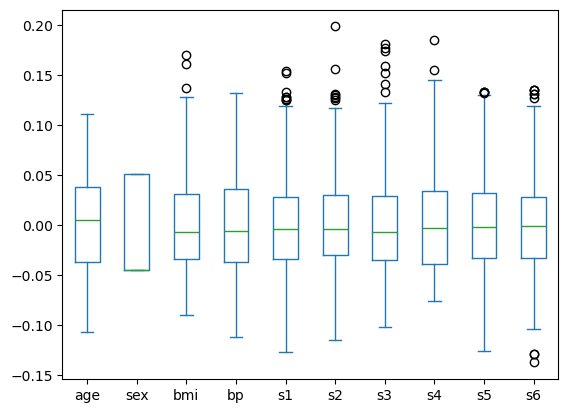

In [12]:
# Plota um boxplot da entrada
X.plot.box()
plt.show()

In [13]:
# Conjunto de dados de saída (y)
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

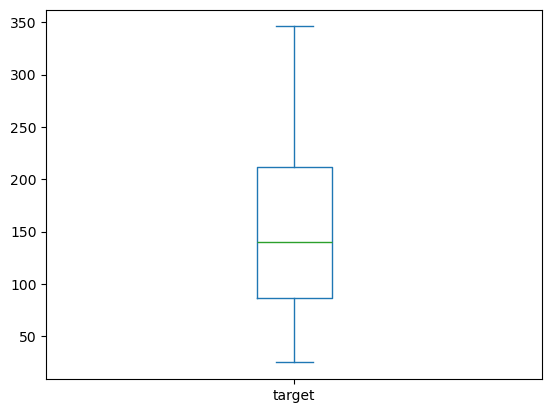

In [14]:
# Plota um boxplot da saída
y.plot.box()
plt.show()

In [15]:
# Mostra as medidas resumo da saída
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [16]:
# Separação em treinamento/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Normaliza os dados antes da modelagem
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [18]:
pd.DataFrame(X_train_std).describe().T

,count,mean,std,min,25%,50%,75%,max
0,309.0,-3.449237e-17,1.001622,-2.343689,-0.772245,0.092049,0.799199,2.370643
1,309.0,2.874364e-17,1.001622,-0.946417,-0.946417,-0.946417,1.056616,1.056616
2,309.0,-3.449237e-17,1.001622,-1.919484,-0.706375,-0.167215,0.663990,3.292393
3,309.0,-2.874364e-18,1.001622,-2.371456,-0.791051,-0.144522,0.717517,2.728942
4,309.0,4.024109e-17,1.001622,-2.302838,-0.724999,-0.093863,0.565961,3.176569
5,309.0,1.724618e-17,1.001622,-2.437584,-0.651486,-0.088832,0.591587,4.131072
6,309.0,-2.299491e-17,1.001622,-2.148059,-0.671245,-0.127155,0.572388,3.836924
7,309.0,1.149746e-17,1.001622,-1.607269,-0.846079,-0.084889,0.676302,3.789570
8,309.0,-1.149746e-17,1.001622,-2.219185,-0.682099,-0.052877,0.662565,2.749316
9,309.0,-2.299491e-17,1.001622,-2.938249,-0.691566,-0.000280,0.604596,2.764868


## Regressão Linear Simples

In [19]:
# bmi vs. y
X_train_simples = X_train_std[:,2].reshape(-1, 1)
X_test_simples = X_test_std[:,2].reshape(-1, 1)

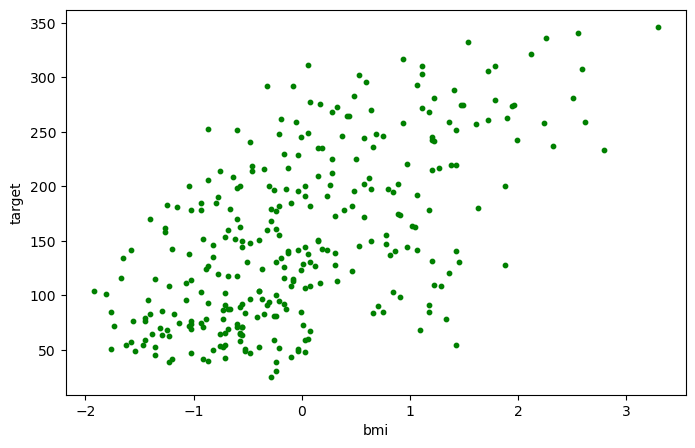

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(X_train_simples, y_train, s=10, color='green')
plt.xlabel("bmi")
plt.ylabel("target")
plt.show()

In [21]:
# Ajusta um modelo de regressão linear simples aos dados
reglin_simples = LinearRegression(fit_intercept=True)
reglin_simples.fit(X_train_simples, y_train)

LinearRegression()

In [22]:
# Coeficiente
print(reglin_simples.coef_)

[47.42179925]


In [23]:
# Intercepto
print(reglin_simples.intercept_)

153.90291262135923


In [24]:
# Equação final
str_eq = "y = %.3fx + %.3f" % (reglin_simples.coef_[0], reglin_simples.intercept_)
print(str_eq)

y = 47.422x + 153.903


In [25]:
# Predição
y_pred_simples = reglin_simples.predict(X_test_simples)

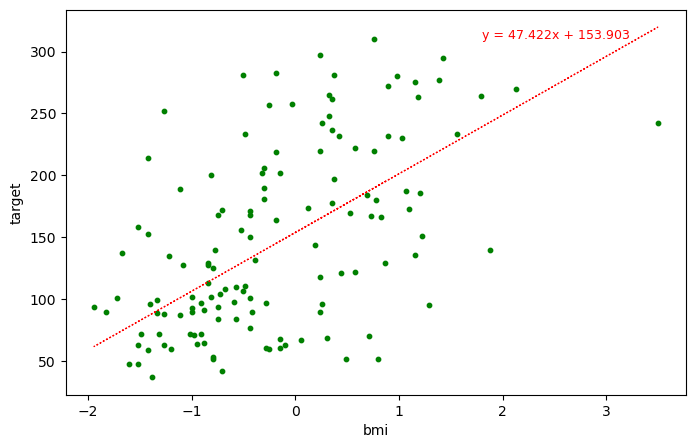

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(X_test_simples, y_test, color='green', s=10)
plt.plot(X_test_simples, y_pred_simples, color='red', linewidth=1, linestyle='dotted')
plt.text(1.8, 310, str_eq, color='red', fontsize=9)
plt.xlabel("bmi")
plt.ylabel("target")
plt.show()

In [27]:
# Avaliação de desempenho
print("R2   = %.3f" % r2_score(y_test, y_pred_simples))
print("MAE  = %.3f" % mean_absolute_error(y_test, y_pred_simples))
print("MSE  = %.3f" % mean_squared_error(y_test, y_pred_simples))
print("RMSE = %.3f" % mean_squared_error(y_test, y_pred_simples, squared=False))

R2   = 0.280
MAE  = 50.593
MSE  = 3884.937
RMSE = 62.329


C:\Users\Anthony\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Regressão Linear Múltipla

In [28]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
225,0.030811,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015,0.003064
412,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207,0.085907
118,-0.056370,0.050680,-0.010517,0.025315,0.023198,0.040022,-0.039719,0.034309,0.020609,0.056912
114,0.023546,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099241,0.023775
364,0.001751,0.050680,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014821,0.098333
...,...,...,...,...,...,...,...,...,...,...
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920
270,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491
348,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357


In [29]:
#df_train = pd.concat([X_train, pd.DataFrame(y_train)], axis=1)
#df_test = pd.concat([X_test, pd.DataFrame(y_test)], axis=1)
#X_train = df_train[['s1', 's5', 's2', 'bmi']]
#X_test = df_test[['s1', 's5', 's2', 'bmi']]

In [30]:
# Ajusta um modelo de regressão linear múltipla aos dados
reglin = LinearRegression(fit_intercept=True)
reglin.fit(X_train, y_train)

LinearRegression()

In [31]:
# Coeficientes
print(reglin.coef_)

[  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
  506.76324136  121.15435079  288.03526689  659.26895081   41.37670105]


In [32]:
# Intercepto
print(reglin.intercept_)

151.00821291456543


In [33]:
# Predição
y_pred = reglin.predict(X_test)

In [34]:
# Avaliação de desempenho
print("R2   = %.3f" % r2_score(y_test, y_pred))
print("MAE  = %.3f" % mean_absolute_error(y_test, y_pred))
print("MSE  = %.3f" % mean_squared_error(y_test, y_pred))
print("RMSE = %.3f" % mean_squared_error(y_test, y_pred, squared=False))

R2   = 0.477
MAE  = 41.919
MSE  = 2821.751
RMSE = 53.120


C:\Users\Anthony\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


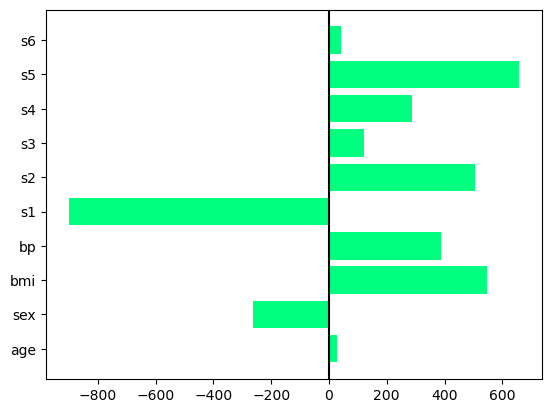

In [35]:
# Importância dos atributos
y_pos = np.arange(len(X_train.columns))
plt.barh(y_pos, reglin.coef_, color='springgreen')
plt.axvline(x=0, color='black')
plt.yticks(y_pos, X_train.columns)
plt.show()

## Regressor Dummy

Para fins experimentais e de comparação, iremos comparar a regressão linear múltipla e o regressor dummy.

In [36]:
dummy = DummyRegressor()
dummy.fit(X_train, y_train)

DummyRegressor()

In [37]:
y_pred_dummy = dummy.predict(X_test)

In [39]:
# Avaliação de desempenho
print("R2   = %.3f" % r2_score(y_test, y_pred_dummy))
print("MAE  = %.3f" % mean_absolute_error(y_test, y_pred_dummy))
print("MSE  = %.3f" % mean_squared_error(y_test, y_pred_dummy))
print("RMSE = %.3f" % mean_squared_error(y_test, y_pred_dummy, squared=False))

R2   = -0.006
MAE  = 64.264
MSE  = 5432.886
RMSE = 73.708


C:\Users\Anthony\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
